## Import Libraries


In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


## Load the data


In [4]:
ticker = 'TSLA'
start_date = '2015-01-01'
end_date = '2025-01-31'
data = yf.download(ticker, start=start_date, end=end_date)
close_prices = data['Close']


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


## Split the data into training and testing sets


In [5]:
train_size = int(len(close_prices) * 0.8)
train, test = close_prices[:train_size], close_prices[train_size:]


## Plot the closing prices


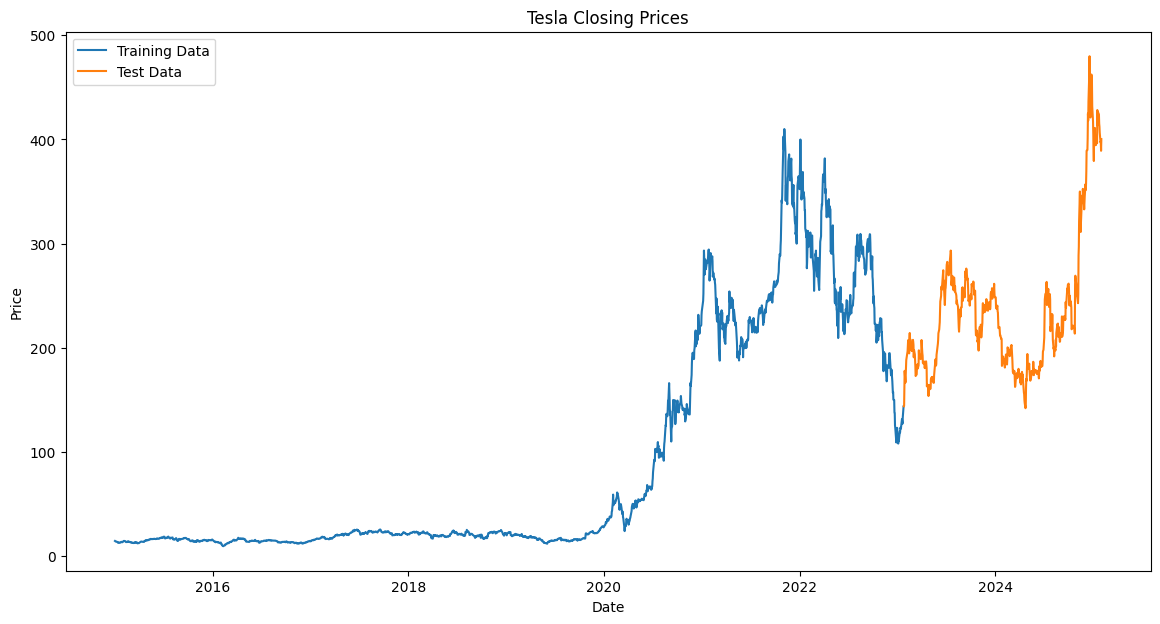

In [6]:
plt.figure(figsize=(14, 7))
plt.plot(train, label='Training Data')
plt.plot(test, label='Test Data')
plt.title('Tesla Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

## Train ARIMA Model

In [7]:
# Manually select ARIMA parameters (p, d, q)
p = 5
d = 1
q = 0

# Train the ARIMA model
arima_model = ARIMA(train, order=(p, d, q))
arima_model_fit = arima_model.fit()

/home/teddy/Desktop/Kifya journey/Kifiya-AIM-Week-11/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/teddy/Desktop/Kifya journey/Kifiya-AIM-Week-11/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/teddy/Desktop/Kifya journey/Kifiya-AIM-Week-11/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


## Forecast


In [8]:
arima_forecast = arima_model_fit.forecast(steps=len(test))


/home/teddy/Desktop/Kifya journey/Kifiya-AIM-Week-11/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/teddy/Desktop/Kifya journey/Kifiya-AIM-Week-11/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


* ##### Plot the forecast


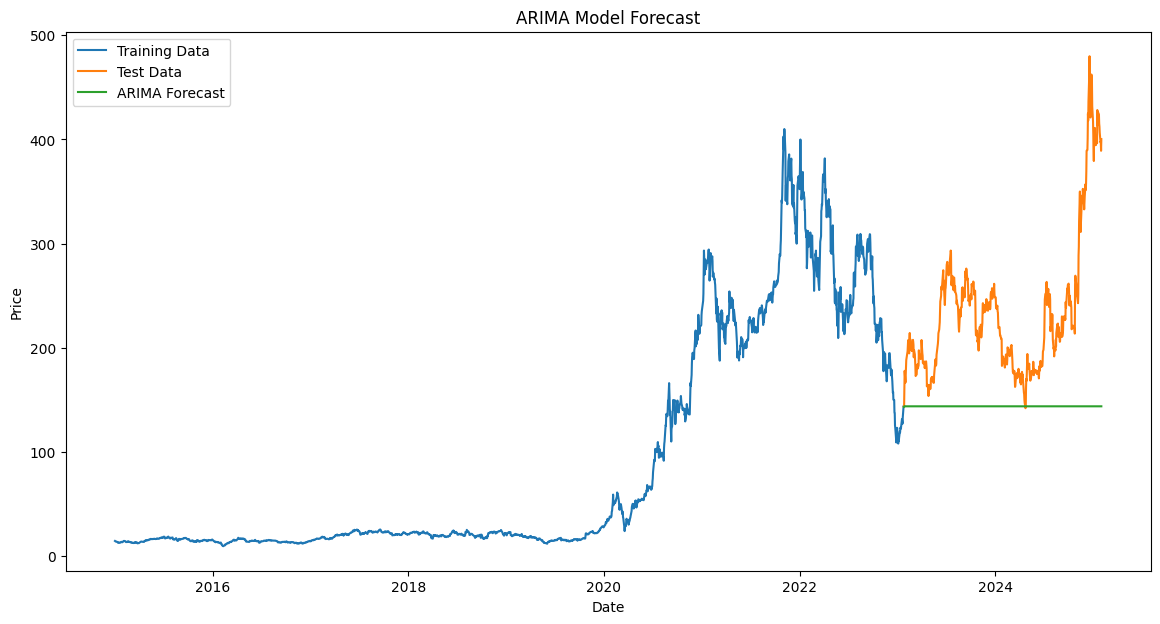

In [9]:
plt.figure(figsize=(14, 7))
plt.plot(train, label='Training Data')
plt.plot(test, label='Test Data')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast')
plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


* ##### Calculate evaluation metrics


In [11]:
arima_mae = mean_absolute_error(test, arima_forecast)
arima_rmse = np.sqrt(mean_squared_error(test, arima_forecast))
arima_mape = np.mean(np.abs((test - arima_forecast) / test)) * 100

print(f'ARIMA Model - MAE: {arima_mae}, RMSE: {arima_rmse}, MAPE: {arima_mape}')


ARIMA Model - MAE: 89.80228002156842, RMSE: 110.98932205315383, MAPE: nan
